In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"shopping_trends_updated.csv")
data.head()


In [3]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [3]:
data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [7]:
#Data set is clean we can go with analysis part

Customer Age Distribution Summary:
Gender  Age
Female  45     33
        52     32
        57     32
        62     32
        31     30
               ..
Male    33     40
        67     40
        45     39
        22     38
        44     28
Name: count, Length: 106, dtype: int64


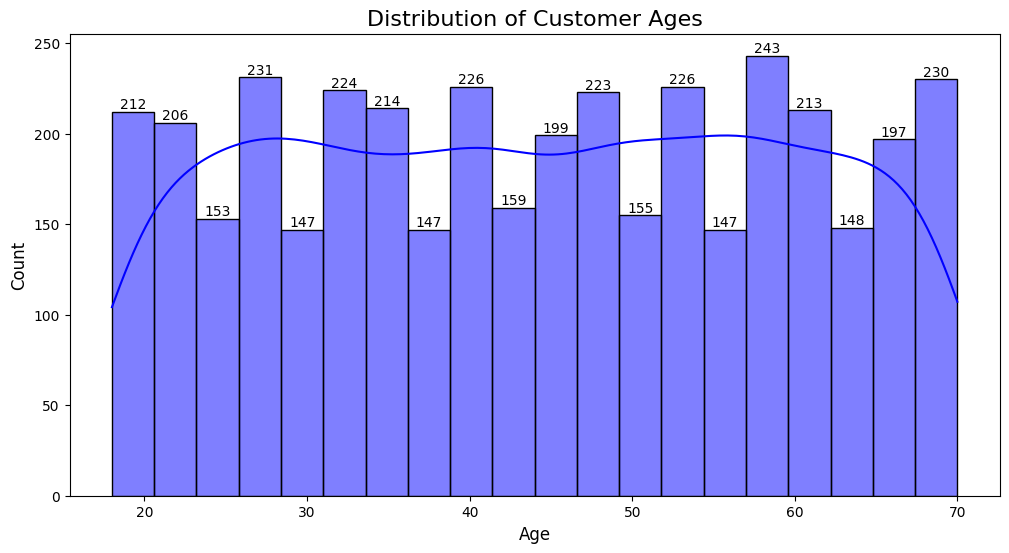

In [6]:
# 1. Distribution of customer ages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"shopping_trends_updated.csv")
print("Customer Age Distribution Summary:")
print(data.groupby('Gender')['Age'].value_counts())
plt.figure(figsize=(12, 6))
ax = sns.histplot(data['Age'], kde=True, bins=20, color='blue')
ax.bar_label(ax.containers[0])
plt.title('Distribution of Customer Ages', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


Average Purchase Amount by Category:
Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64


C:\Users\chintu\AppData\Local\Temp\ipykernel_16524\1973500265.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_purchase_category.index, y=avg_purchase_category.values, palette='viridis')


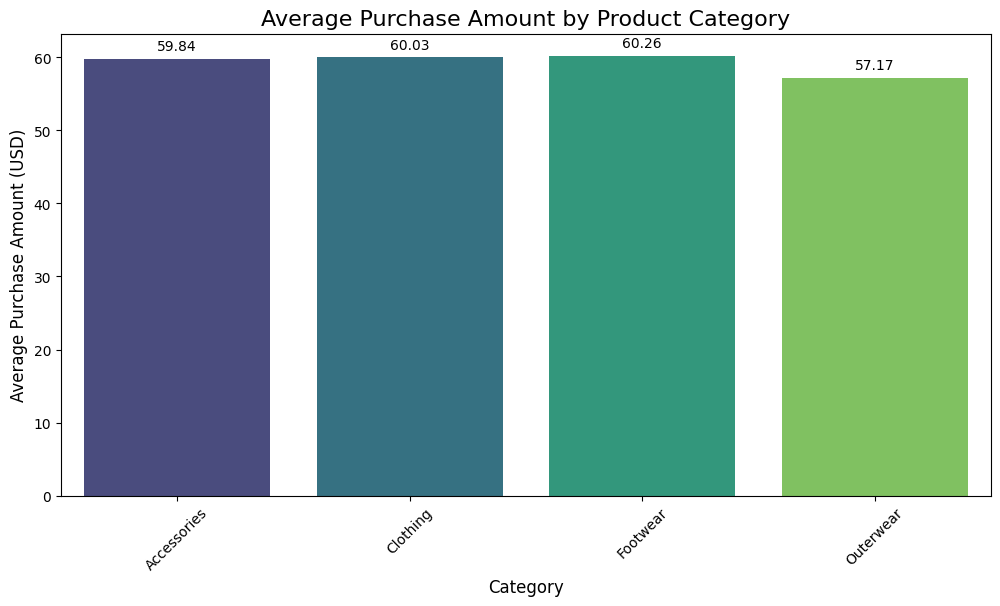

In [3]:
# 2. Average purchase amount across different product categories
avg_purchase_category = data.groupby('Category')['Purchase Amount (USD)'].mean()
print("\nAverage Purchase Amount by Category:")
print(avg_purchase_category)

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=avg_purchase_category.index, y=avg_purchase_category.values, palette='viridis')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.title('Average Purchase Amount by Product Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Purchase Amount (USD)', fontsize=12)
plt.xticks(rotation=45)  # Rotate the category labels for better readability
plt.show()



Number of Purchases by Gender:
Gender
Male      2652
Female    1248
Name: count, dtype: int64


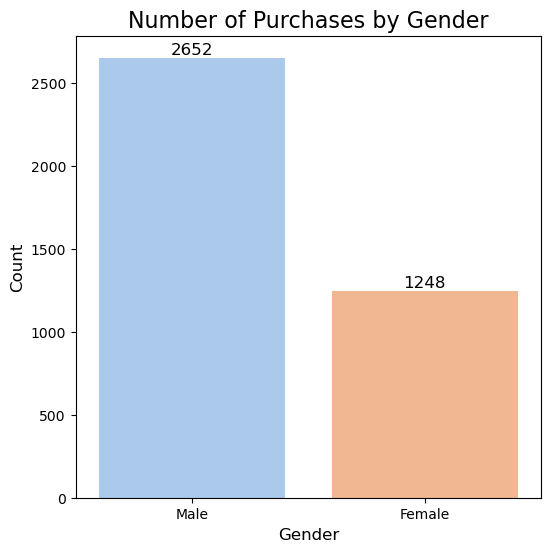

In [35]:
# 3. Gender with the highest number of purchases
gender_counts = data['Gender'].value_counts()

print("\nNumber of Purchases by Gender:")
print(gender_counts)

plt.figure(figsize=(6, 6))
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, hue=gender_counts.index, palette='pastel', dodge=False)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')

# Customize plot
plt.title('Number of Purchases by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()



Most Commonly Purchased Items by Category:
Category
Accessories    Jewelry
Clothing        Blouse
Footwear       Sandals
Outerwear       Jacket
Name: Item Purchased, dtype: object


C:\Users\chintu\AppData\Local\Temp\ipykernel_7728\1721007176.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=common_items_count.index, y=common_items_count.values, palette='Greens_r')


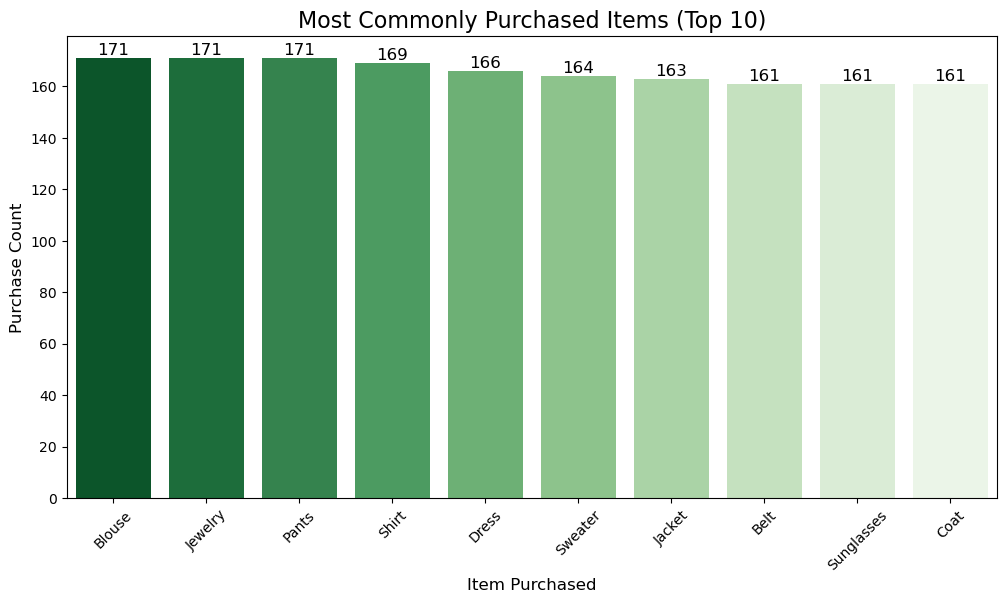

In [46]:
#4. Most Commonly Purchased Items in Each Category
most_common_items = data.groupby('Category')['Item Purchased'].agg(lambda x: x.value_counts().idxmax())
print("\nMost Commonly Purchased Items by Category:")
print(most_common_items)

plt.figure(figsize=(12, 6))
common_items_count = data['Item Purchased'].value_counts().head(10)  # Display top 10 for clarity
ax = sns.barplot(x=common_items_count.index, y=common_items_count.values, palette='Greens_r')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.title('Most Commonly Purchased Items (Top 10)', fontsize=16)
plt.xlabel('Item Purchased', fontsize=12)
plt.ylabel('Purchase Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


C:\Users\chintu\AppData\Local\Temp\ipykernel_7728\2088083756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=seasonal_spending.index, y=seasonal_spending.values, palette='coolwarm')


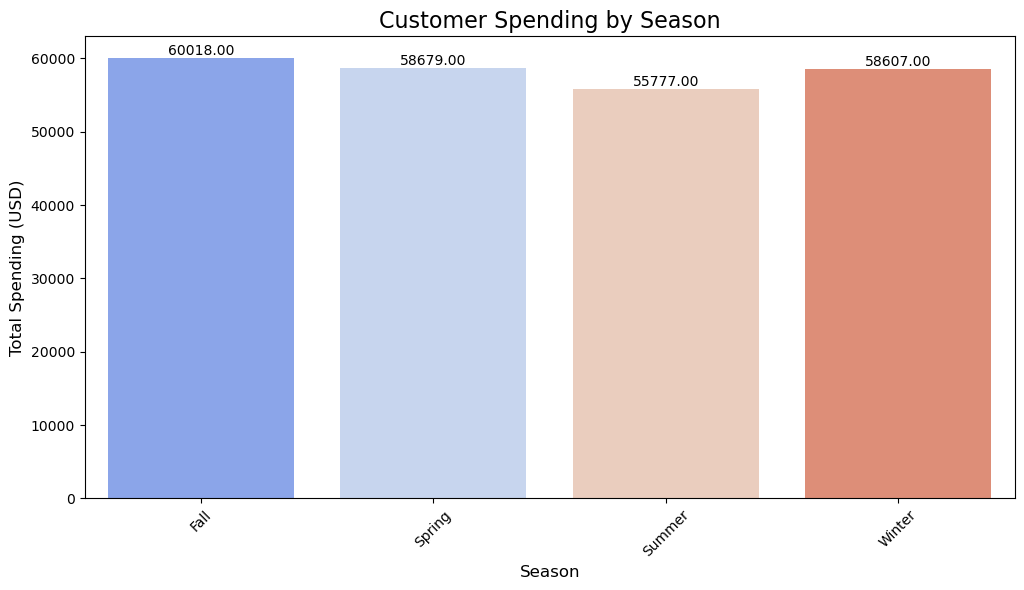

In [50]:
# 5. Purchase frequency across different customer segments
seasonal_spending = data.groupby('Season')['Purchase Amount (USD)'].sum()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=seasonal_spending.index, y=seasonal_spending.values, palette='coolwarm')

# Add data labels using ax.patches
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

ax.set_title('Customer Spending by Season', fontsize=16)
ax.set_xlabel('Season', fontsize=12)
ax.set_ylabel('Total Spending (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


C:\Users\chintu\AppData\Local\Temp\ipykernel_16524\3611412791.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_rating_category.index, y=avg_rating_category.values, palette='cubehelix')


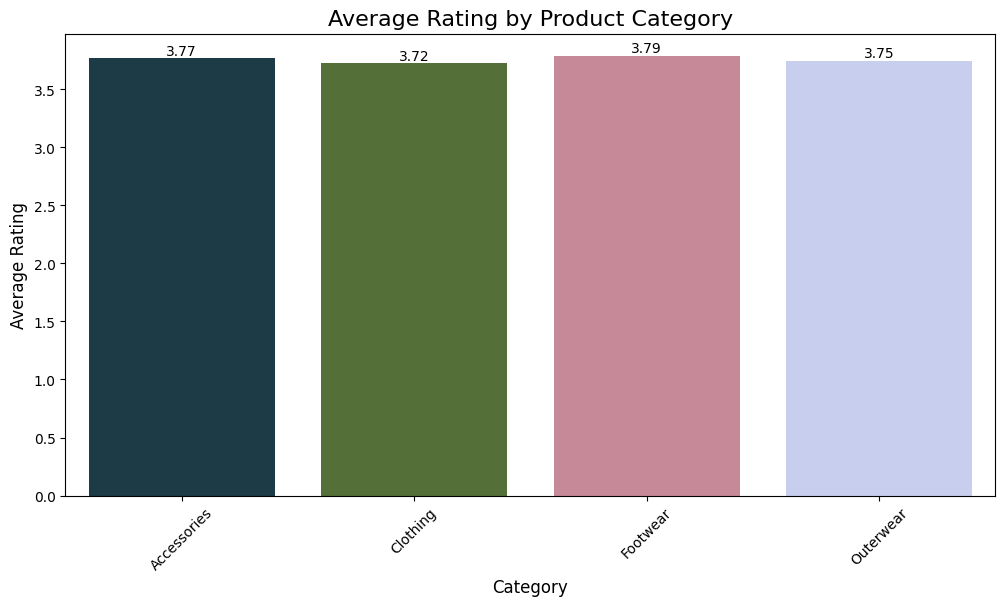

In [7]:
#6.	What is the average rating given by customers for each product category?
avg_rating_category = data.groupby('Category')['Review Rating'].mean()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=avg_rating_category.index, y=avg_rating_category.values, palette='cubehelix')

# Add data labels using ax.patches
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

ax.set_title('Average Rating by Product Category', fontsize=16)
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45)
plt.show()


C:\Users\chintu\AppData\Local\Temp\ipykernel_16524\3036779443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subscribed_behavior.index, y=subscribed_behavior.values, palette='Spectral')


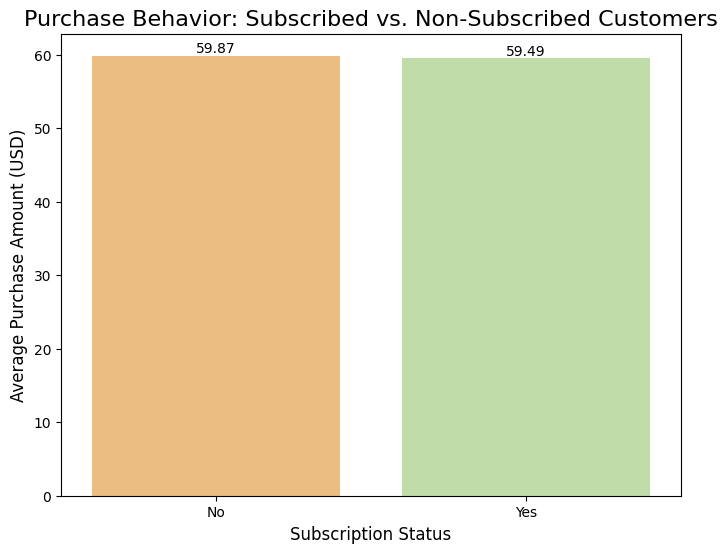

In [8]:
#7.	Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?
subscribed_behavior = data.groupby('Subscription Status')['Purchase Amount (USD)'].mean()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=subscribed_behavior.index, y=subscribed_behavior.values, palette='Spectral')

# Add data labels using ax.patches
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

ax.set_title('Purchase Behavior: Subscribed vs. Non-Subscribed Customers', fontsize=16)
ax.set_xlabel('Subscription Status', fontsize=12)
ax.set_ylabel('Average Purchase Amount (USD)', fontsize=12)
plt.show()


C:\Users\chintu\AppData\Local\Temp\ipykernel_7728\3167367193.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='plasma')


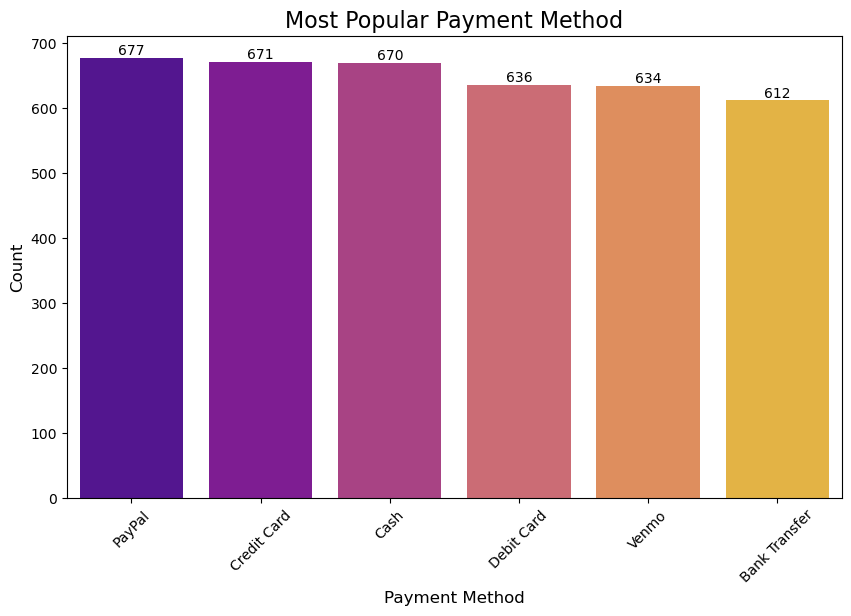

In [53]:
#8.	Which payment method is the most popular among customers?
payment_counts = data['Payment Method'].value_counts()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='plasma')

# Add data labels using ax.patches
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

ax.set_title('Most Popular Payment Method', fontsize=16)
ax.set_xlabel('Payment Method', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


C:\Users\chintu\AppData\Local\Temp\ipykernel_16524\4239591282.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=promo_spending.index, y=promo_spending.values, palette='coolwarm')


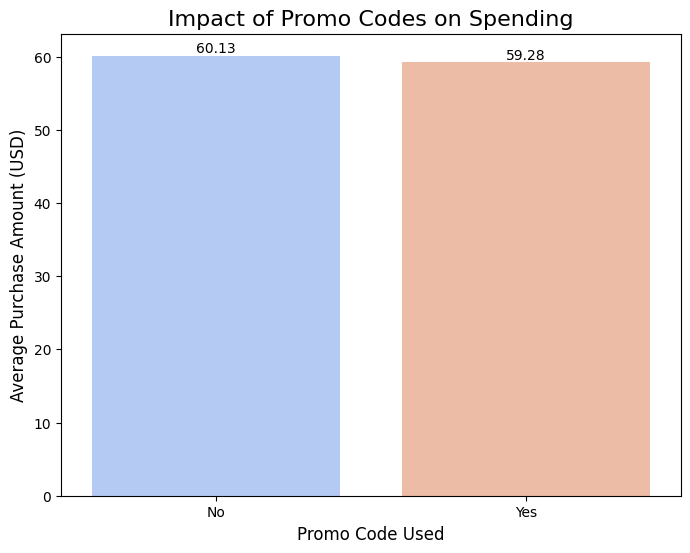

In [9]:
#9.	Do customers who use promo codes tend to spend more than those who don't?
promo_spending = data.groupby('Promo Code Used')['Purchase Amount (USD)'].mean()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=promo_spending.index, y=promo_spending.values, palette='coolwarm')

# Add data labels using ax.patches
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

ax.set_title('Impact of Promo Codes on Spending', fontsize=16)
ax.set_xlabel('Promo Code Used', fontsize=12)
ax.set_ylabel('Average Purchase Amount (USD)', fontsize=12)
plt.show()


C:\Users\chintu\AppData\Local\Temp\ipykernel_16524\1504857532.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=purchase_frequency.index, y=purchase_frequency.values, palette='Blues')


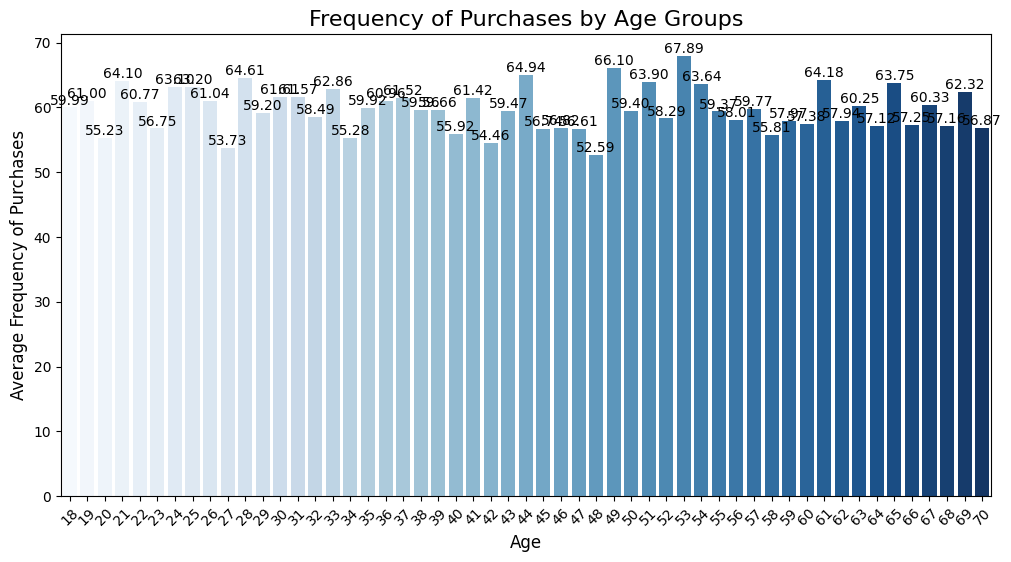

In [13]:
#10.	How does the frequency of purchases vary across different age groups?
purchase_frequency = data.groupby('Age')['Purchase Amount (USD)'].mean()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=purchase_frequency.index, y=purchase_frequency.values, palette='Blues')

# Add data labels using ax.patches
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

ax.set_title('Frequency of Purchases by Age Groups', fontsize=16)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Average Frequency of Purchases', fontsize=12)
plt.xticks(rotation=45)
plt.show()


C:\Users\chintu\AppData\Local\Temp\ipykernel_16524\1877863903.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=size_purchase_amount.index, y=size_purchase_amount.values, palette='viridis')


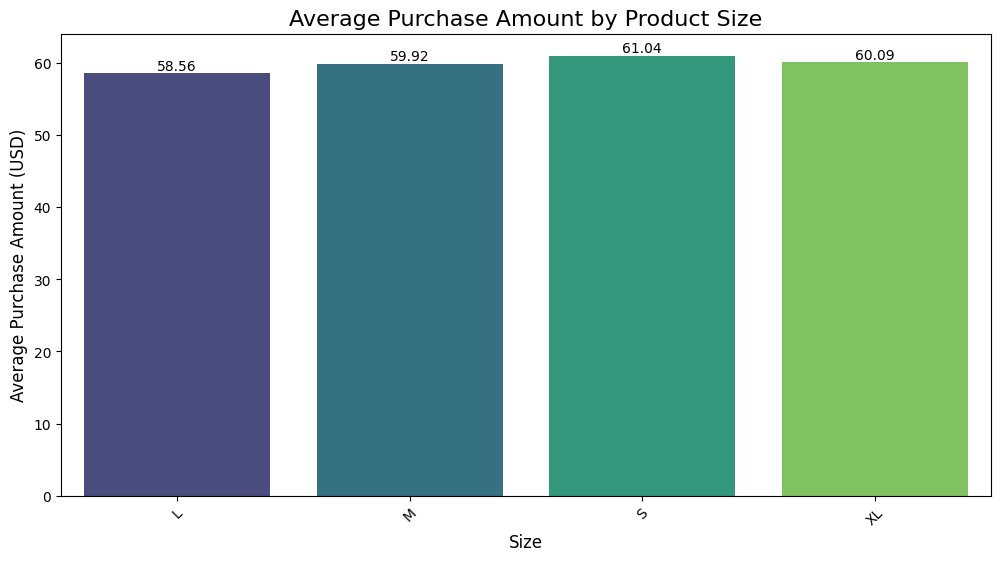

In [15]:
#11.Are there any correlations between the size of the product and the purchase amount?
size_purchase_amount = data.groupby('Size')['Purchase Amount (USD)'].mean()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=size_purchase_amount.index, y=size_purchase_amount.values, palette='viridis')

# Add data labels using ax.patches
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

ax.set_title('Average Purchase Amount by Product Size', fontsize=16)
ax.set_xlabel('Size', fontsize=12)
ax.set_ylabel('Average Purchase Amount (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

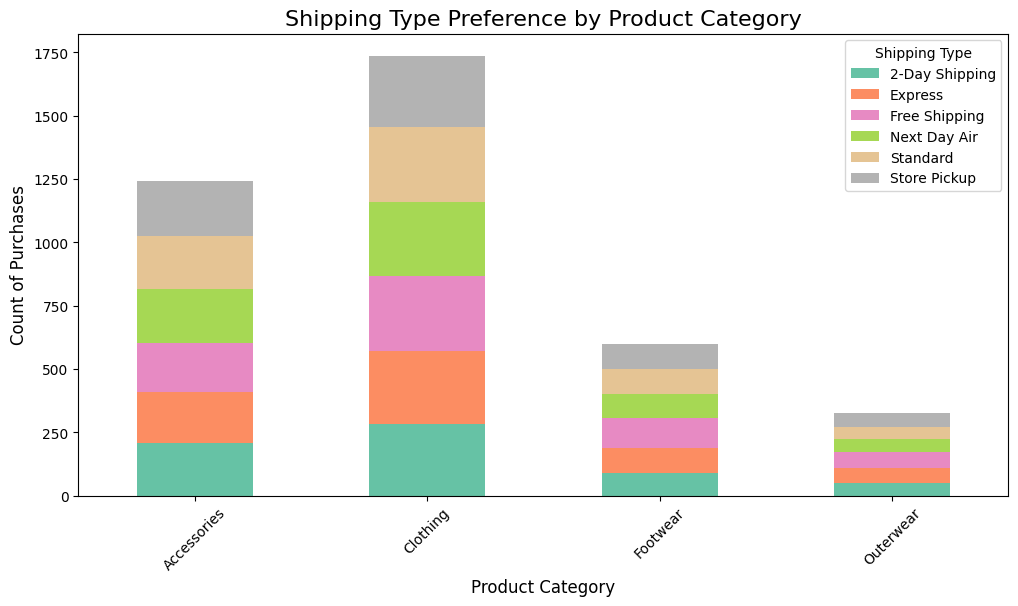

In [16]:
#12.	Which shipping type is preferred by customers for different product categories?
shipping_by_category = data.groupby(['Category', 'Shipping Type']).size().unstack()
plt.figure(figsize=(12, 6))
ax = shipping_by_category.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

ax.set_title('Shipping Type Preference by Product Category', fontsize=16)
ax.set_xlabel('Product Category', fontsize=12)
ax.set_ylabel('Count of Purchases', fontsize=12)
plt.xticks(rotation=45)
plt.show()


C:\Users\chintu\AppData\Local\Temp\ipykernel_16524\2339185139.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=discount_spending.index, y=discount_spending.values, palette='crest')


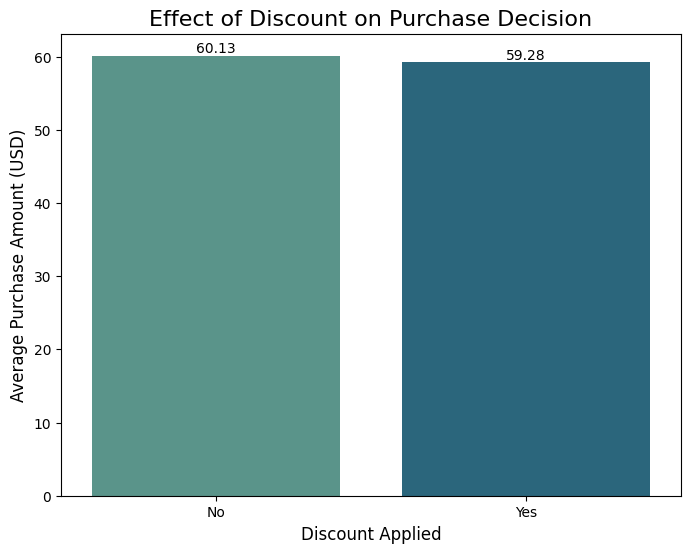

In [17]:
#13.How does the presence of a discount affect the purchase decision of customers?
discount_spending = data.groupby('Discount Applied')['Purchase Amount (USD)'].mean()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=discount_spending.index, y=discount_spending.values, palette='crest')

# Add data labels using ax.patches
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

ax.set_title('Effect of Discount on Purchase Decision', fontsize=16)
ax.set_xlabel('Discount Applied', fontsize=12)
ax.set_ylabel('Average Purchase Amount (USD)', fontsize=12)
plt.show()


C:\Users\chintu\AppData\Local\Temp\ipykernel_7728\457588842.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=color_counts.index, y=color_counts.values, palette='coolwarm')


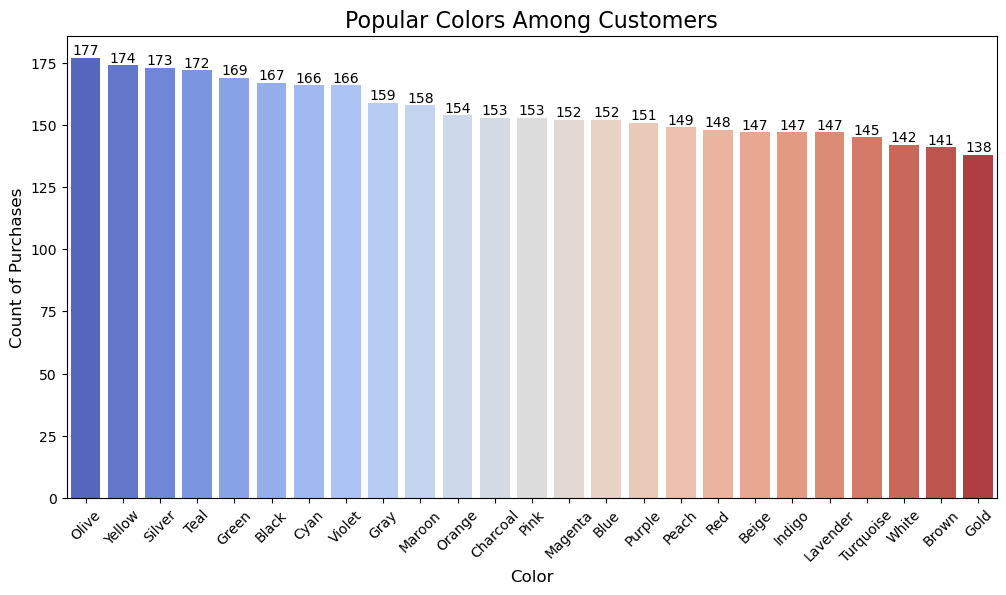

In [63]:
#14. Are there any specific colors that are more popular among customers?
color_counts = data['Color'].value_counts()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=color_counts.index, y=color_counts.values, palette='coolwarm')

# Add data labels using ax.patches
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

ax.set_title('Popular Colors Among Customers', fontsize=16)
ax.set_xlabel('Color', fontsize=12)
ax.set_ylabel('Count of Purchases', fontsize=12)
plt.xticks(rotation=45)
plt.show()


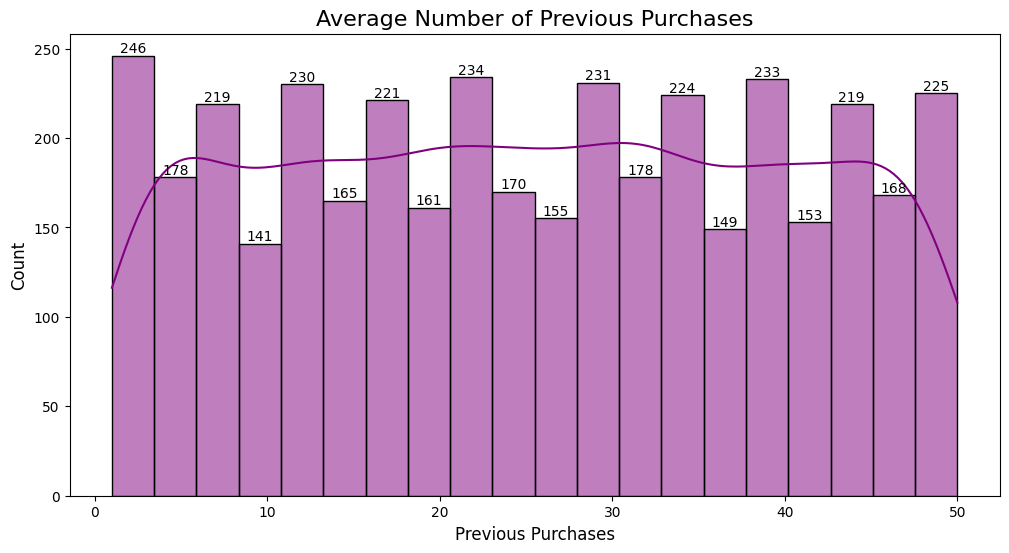

In [ ]:
#15.What is the average number of previous purchases made by customers?
avg_previous_purchases = data.groupby('Customer ID')['Previous Purchases'].mean()
plt.figure(figsize=(12, 6))
ax = sns.histplot(avg_previous_purchases, kde=True, bins=20, color='purple')

# Add data labels using ax.patches
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

ax.set_title('Average Number of Previous Purchases', fontsize=16)
ax.set_xlabel('Previous Purchases', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()


Object `customers` not found.


C:\Users\chintu\AppData\Local\Temp\ipykernel_16524\292766604.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Review Rating', y='Purchase Amount (USD)', data=rating_purchase_avg, palette='autumn')


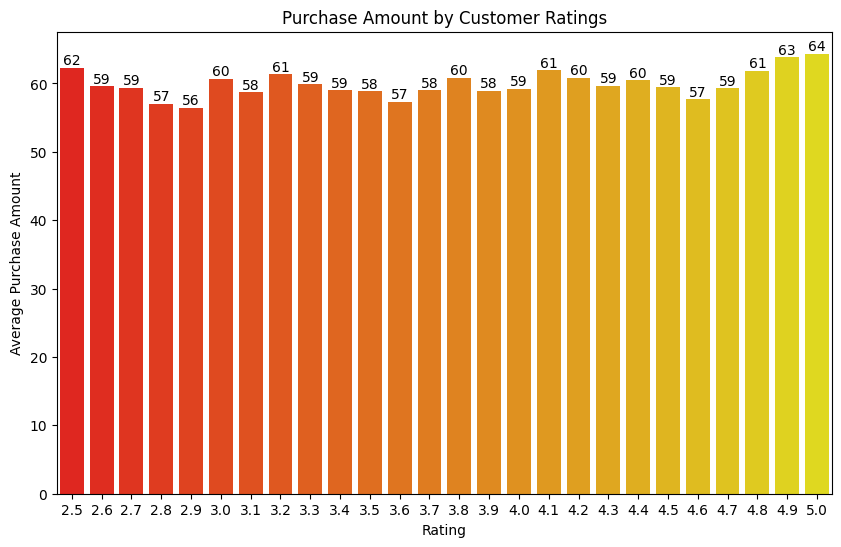

In [27]:
16.	How does the purchase amount differ based on the review ratings given by customers?
rating_purchase_avg = data.groupby('Review Rating')['Purchase Amount (USD)'].mean().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Review Rating', y='Purchase Amount (USD)', data=rating_purchase_avg, palette='autumn')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)
plt.title('Purchase Amount by Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Average Purchase Amount')
plt.show()



C:\Users\chintu\AppData\Local\Temp\ipykernel_16524\3816054306.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=location_purchase_counts.index, y=location_purchase_counts.values, palette='cubehelix')


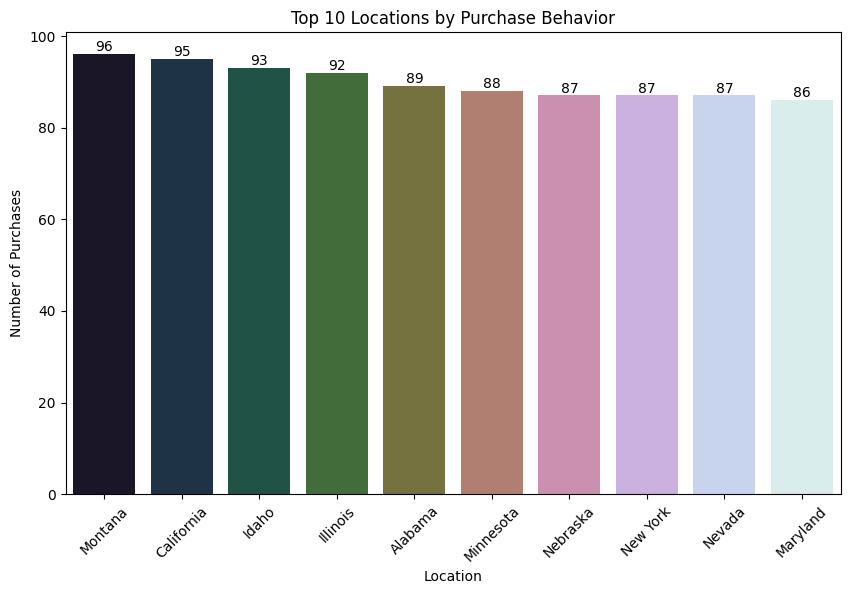

In [31]:
#17.	Are there any noticeable differences in purchase behavior between different locations?
location_purchase_counts = data['Location'].value_counts().head(10)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=location_purchase_counts.index, y=location_purchase_counts.values, palette='cubehelix')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)
plt.title('Top 10 Locations by Purchase Behavior')
plt.xlabel('Location')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

C:\Users\chintu\AppData\Local\Temp\ipykernel_16524\2178517411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Age', data= data, palette='cool')


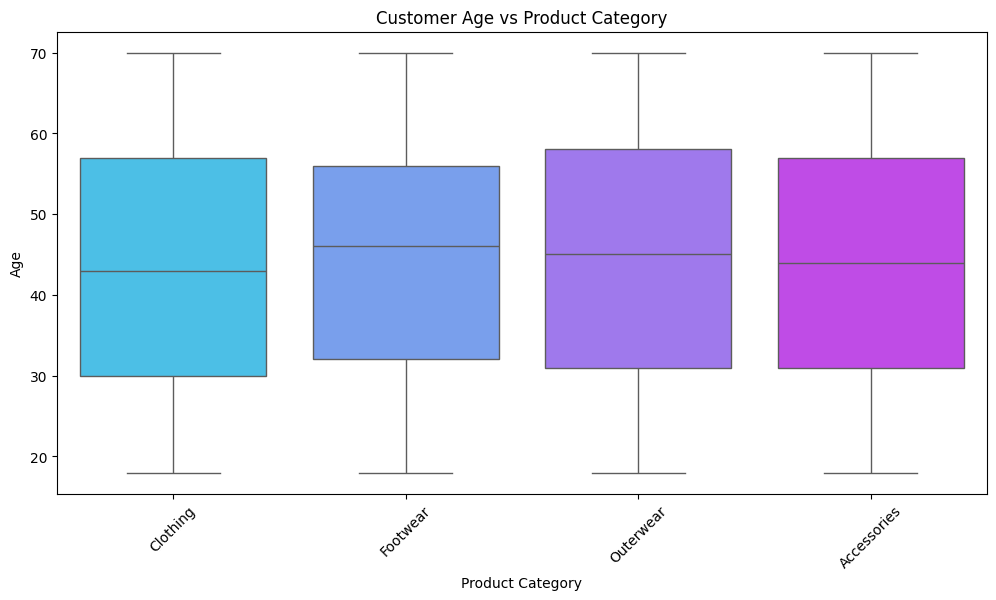

In [36]:
#18.Is there a relationship between customer age and the category of products they purchase?
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Age', data= data, palette='cool')
plt.title('Customer Age vs Product Category')
plt.xlabel('Product Category')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

C:\Users\chintu\AppData\Local\Temp\ipykernel_16524\3178122463.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Gender', y='Purchase Amount (USD)', data=gender_avg_purchase, palette='viridis')


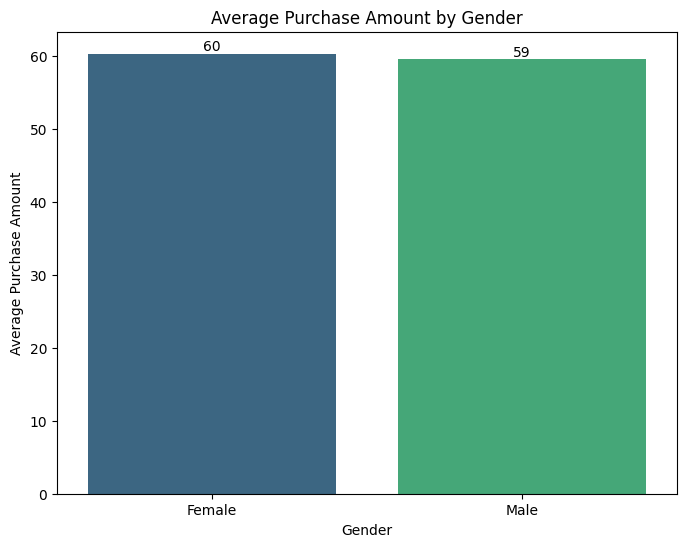

In [40]:
#19.How does the average purchase amount differ between male and female customers?
gender_avg_purchase = data.groupby('Gender')['Purchase Amount (USD)'].mean().reset_index()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Gender', y='Purchase Amount (USD)', data=gender_avg_purchase, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')
plt.show()
